 *MHWs plot categories*

In [1]:
'''
    Function for plot categories MHW
    Bruna Alves, 2020
    Ocean Hack Week MHW project
'''

from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

def event_line_cat(ev, sst, mhws, clim):
    '''
    inputs:
    'ev'    event number, you must select event from mhws (obtained from mhw.detect)
    'sst'   sea surface temperature variable (1D)
    'mhws'  output from mhw.detect
    'clim'  output from mhw.detect 
    '''
    
    diff = clim['thresh']-clim['seas']     
    threshold2x = clim['thresh']+diff
    threshold3x = threshold2x+diff
    threshold4x = threshold3x+diff
    
    plt.figure(figsize=(14,10))
    for ev0 in np.arange(ev-10, ev+11, 1):
        t1 = np.where(t==mhws['time_start'][ev0])[0][0]
        t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    
        #Plot fill
        #Moderate
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], color=colors['gold'])
    
        #Strong
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold2x[t1:t2+1],
                  where = (sst[t1:t2+1] > clim['thresh'][t1:t2+1]) & (sst [t1:t2+1] > threshold2x[t1:t2+1]), 
                  color=colors['coral'])
    
        #Severe
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold3x[t1:t2+1], 
                  where = (sst[t1:t2+1] > threshold2x[t1:t2+1]) & (sst [t1:t2+1] > threshold3x[t1:t2+1]), 
                  color=colors['crimson'])
    
        #Extreme
        plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], threshold4x[t1:t2+1], 
                     where = (sst[t1:t2+1] > threshold3x[t1:t2+1]) & (sst [t1:t2+1] > threshold4x[t1:t2+1]), 
                     color=colors['darkred'])

    
        # Plot SST, Thresh, 2x, 3x, 4x
    plt.plot(dates, sst, 'k-', linewidth=2,label='SST')
    plt.plot(dates, clim['seas'], '-', linewidth=2, color=colors['steelblue'],label = 'Climatology')
    plt.plot(dates, clim['thresh'], 'g-', linewidth=2, label = 'Threshold')
    plt.plot(dates,threshold2x, 'g--',linewidth=2,label = '2x Threshold')
    plt.plot(dates,threshold3x, 'g-.',linewidth=2, label = '3x Threshold')
    plt.plot(dates,threshold4x, 'g:',linewidth=2, label = '4x Threshold')
    plt.title('MHW Categories')       
    plt.xlim(datetime.date.fromordinal(mhws['time_start'][ev]-150), datetime.date.fromordinal(mhws['time_end'][ev]+150))
    plt.legend()

In [2]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load marineHeatWaves definition module
import marineHeatWaves as mhw

In [4]:
# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2014,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]
# Generate synthetic temperature time series
sst = np.zeros(len(t))
sst[0] = 0 # Initial condition
a = 0.85 # autoregressive parameter
for i in range(1,len(t)):
    sst[i] = a*sst[i-1] + 0.75*np.random.randn() + 0.5*np.cos(t[i]*2*np.pi/365.25)
sst = sst - sst.min() + 5.

In [5]:
mhws, clim = mhw.detect(t, sst)

In [6]:
mhws['n_events']

65

In [7]:
mhws['intensity_max'][0:10]

[3.1352253801031136,
 3.77873161298613,
 3.644352954720441,
 3.6607976052507425,
 3.4114284709005034,
 2.4833913417523377,
 4.913313509742153,
 3.111816537172251,
 3.004925624178979,
 3.7964322763979883]

In [8]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print ('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print ('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print ('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print ('Duration:', mhws['duration'][ev], 'days')
print ('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print ('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))
print(ev)

Maximum intensity: 6.609021612295738 deg. C
Average intensity: 3.8861904854949096 deg. C
Cumulative intensity: 69.95142873890838 deg. C-days
Duration: 18 days
Start date: 01 April 2005
End date: 18 April 2005
41


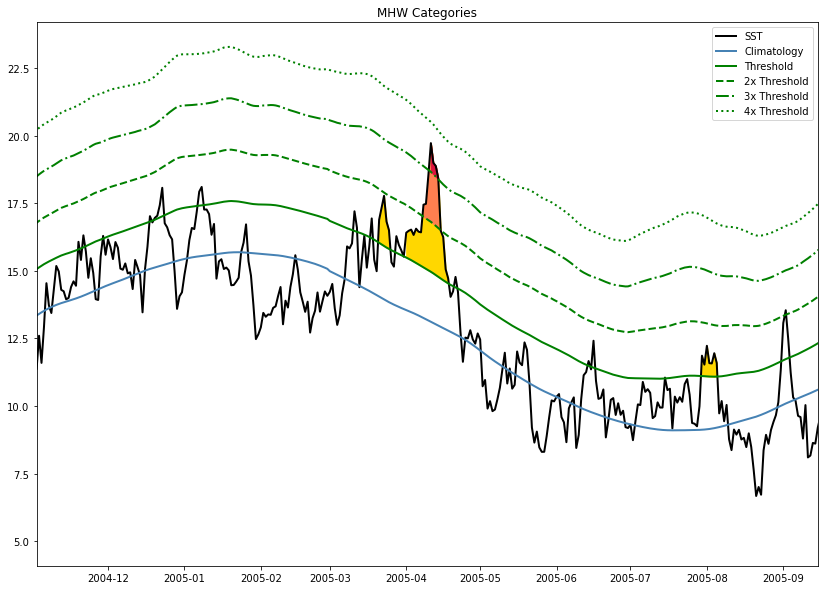

In [9]:
event_line_cat(ev,sst,mhws,clim)